# 441B Assignment 5

# Pregya Vijayakumar


# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("fraudTest.csv")

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X_train_data, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [7]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_data)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [9]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [10]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [13]:
over_log.score(X_test, y_test)

0.9157849276614122

In [14]:
under_log.score(X_test, y_test)

0.9033086206482881

In [15]:
smote_log.score(X_test, y_test)

0.9132656733606852

# 5.) Which performed best in Out of Sample metrics?

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
y_true = y_test

In [18]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76079,  6923],
       [   97,   259]])

In [19]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7275280898876404


In [20]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75039,  7963],
       [   97,   259]])

In [21]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7275280898876404


In [22]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75869,  7133],
       [   97,   259]])

In [23]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7275280898876404


#### All of them perform the same; when we run the code multiple times, the sensitivites change and we often see the SMOTE or the under sample perform better than the over sample. 

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [24]:
raw_temp = pd.concat([X_train_data, y_train], axis =1)

In [25]:
raw_temp

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,is_fraud
87318,24.23,2971,35,False,True,False,False,False,False,False,False,False,False,False,False,False,False,0
342003,65.12,4993,52,False,False,False,True,False,False,False,False,False,False,False,False,False,False,0
17636,60.02,207410,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,0
36165,130.80,6713,46,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0
122299,90.25,1302,14,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418662,276.88,134056,2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0
126932,37.36,1583,23,False,False,True,False,False,False,False,False,False,False,False,False,False,False,0
239979,11.74,3495,49,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0
191449,61.62,1126,31,False,False,False,False,False,False,True,False,False,False,False,False,False,False,0


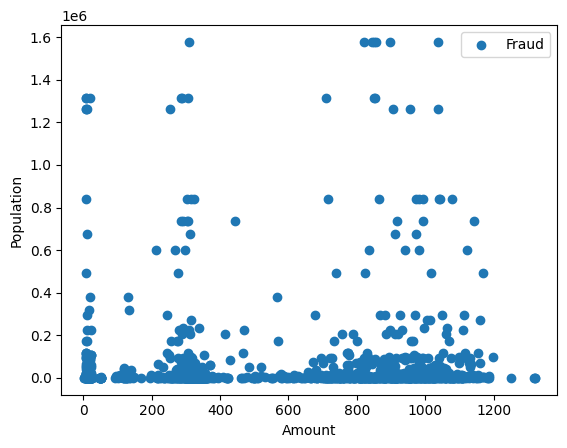

In [26]:
#Plotting two features before smote

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [27]:
smote_X_data, smote_y = smote.fit_resample(X_train_data, y_train)

In [28]:
raw_temp = pd.concat([smote_X_data, smote_y], axis =1)

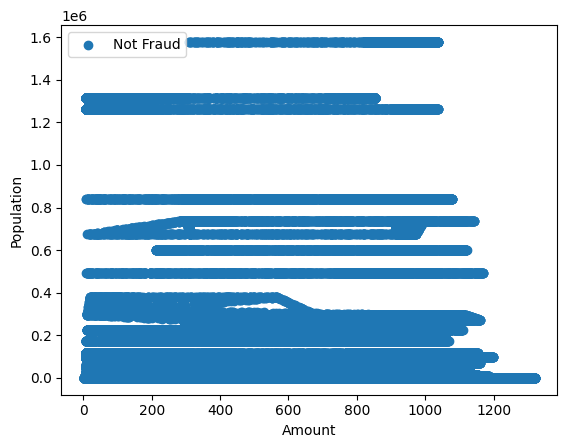

In [29]:
#Plotting two features after smote
plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [31]:
# creating dictionaries
resample_methods = {
    "over" : RandomOverSampler(), 
    "under" : RandomUnderSampler(), 
    "smote" : SMOTE()
}

model_configs = {
    "LOG" : LogisticRegression(), 
    "LASSO" : LogisticRegression(penalty= "l1", 
                                 C =2., 
                                solver = "liblinear"), 
    "DTREE" : DecisionTreeClassifier()
}

In [32]:
#defining out matrix
def calc_perf_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return(sensitivity, specificity, precision, recall, f1)

In [33]:
trained_models = {}
results = []

In [34]:
#training our model and getting the scores
for resample_key, resample in resample_methods.items():
    resample_X, resample_y = resample.fit_resample(X_train, y_train)
    
    for model_name, model in model_configs.items():
        combined_key = f"{resample_key}_{model_name}"

        m = model.fit(resample_X, resample_y)

        trained_models[combined_key] = m

        y_pred = m.predict(X_test)

        sensitivity, specificity, precision, recall, f1 = calc_perf_metrics(y_test, y_pred)

        results.append({"Model" : combined_key, 
                       "Sensitivity" : sensitivity, 
                       "Specificity" : specificity, 
                       "Precision" : precision, 
                       "Recall" : recall, 
                       "F1" : f1})   

In [35]:
result_df = pd.DataFrame(results)

In [36]:
#presenting our scores for the models
result_df

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.727528,0.914918,0.035378,0.727528,0.067474
1,over_LASSO,0.727528,0.914906,0.035373,0.727528,0.067465
2,over_DTREE,0.528090,0.998277,0.567976,0.528090,0.547307
3,under_LOG,0.727528,0.912207,0.034323,0.727528,0.065553
4,under_LASSO,0.727528,0.911990,0.034241,0.727528,0.065404
5,under_DTREE,0.955056,0.944977,0.069289,0.955056,0.129204
6,smote_LOG,0.727528,0.915412,0.035577,0.727528,0.067837
7,smote_LASSO,0.727528,0.915363,0.035557,0.727528,0.067801
8,smote_DTREE,0.696629,0.992904,0.296296,0.696629,0.415759


#### All the models perform equally. But when we compare all the models, the over_DTREE, under_DTREE and smote_DTREE perform the best. This is because those two have a relatively higher Precision scored compared to the others (0.56, 0.29) while the rest have around (0.03). From this we can infer that DTREE is the best one out of the three. The same can be said for the F1 Score, but on the other hand, they suffer when it comes to the recall and sensitivity score as it is relatively lower compared to the others. Since sensitivity is the most important thing in our situation, we can then conclude that amongst the others, the under_DTREE performs the best with a high sensitivity, specificity, recall, higher precision and F1 compared to others. Overall, we can say that the Decision Tree performs the best compared to the Log and Lasso Models. 

#### Hence we test on under_DTREE with the holdout because when it comes to Credit Card Frauds, one of the most important metrics to judge it is the Sensitivity score and it is highest for the under_DTREE.  Although it has a smaller F1 score and is the third best, when comparing the other metrics it vastly overperforms the top 2 which are the over_DTREE and smote_DTREE. 

In [37]:
# testing for the holdout
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [59]:
#fitting our model and presenting our scores
m = model.fit(under_X, under_y)
predictions = m.predict(X_holdout)
sensitivity, specificity, precision, recall, f1 = calc_perf_metrics(y_holdout, predictions)

results2 = []
results2.append({"Model" : 'under_DTREE', 
                "Sensitivity" : sensitivity, 
                       "Specificity" : specificity, 
                       "Precision" : precision, 
                       "Recall" : recall, 
                       "F1" : f1})

In [60]:
result_df = pd.DataFrame(results2)

In [61]:
result_df

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,under_DTREE,0.948276,0.953186,0.078273,0.948276,0.14461


### Hence, we still get a relatively higher result compared to the other models from our initial testing and we can conclude with the fact that under_DTREE is still better and over_DTREE and smote_DTREE are close when it comes to checking the F1 and precision scores.